### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [5]:
pct_to_target[0:10]

array([0.87, 1.07, 0.99, 0.97, 0.93, 0.98, 0.97, 1.09, 1.01, 1.1 ])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [7]:
sales_target[0:10]

array([ 75000, 200000, 100000, 200000, 300000,  75000,  75000, 300000,
       200000, 100000])

In [8]:
# Show how to create the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,0.87,75000
1,1.07,200000
2,0.99,100000
3,0.97,200000
4,0.93,300000


<AxesSubplot:title={'center':'Historical % to Target Distribution'}, ylabel='Frequency'>

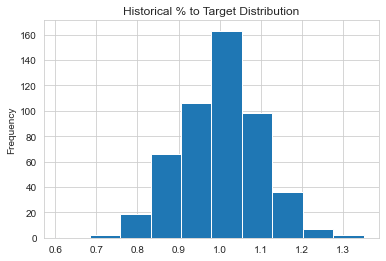

In [9]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

<AxesSubplot:title={'center':'Historical Sales Target Distribution'}, ylabel='Frequency'>

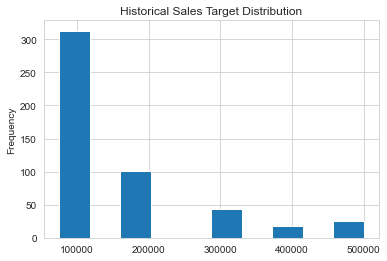

In [10]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [11]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [12]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [13]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [14]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,0.87,75000,65250.0,0.02
1,1.07,200000,214000.0,0.04
2,0.99,100000,99000.0,0.03
3,0.97,200000,194000.0,0.03
4,0.93,300000,279000.0,0.03


In [15]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [16]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.87,75000,65250.0,0.02,1305.0
1,1.07,200000,214000.0,0.04,8560.0
2,0.99,100000,99000.0,0.03,2970.0
3,0.97,200000,194000.0,0.03,5820.0
4,0.93,300000,279000.0,0.03,8370.0


In [17]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

80359500.0 2773047.5 79925000


In [18]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.00000,500.00000
mean,1.000820,159850.000000,160719.000000,0.03350,5546.09500
std,0.097846,115557.061094,119831.465815,0.00762,4684.39975
min,0.610000,75000.000000,56250.000000,0.02000,1125.00000
25%,0.937500,75000.000000,79500.000000,0.03000,2850.00000
50%,1.000000,100000.000000,101000.000000,0.04000,3600.00000
75%,1.070000,200000.000000,206000.000000,0.04000,8080.00000
max,1.350000,500000.000000,600000.000000,0.04000,24000.00000


### Show Full Example of the simulation

In [19]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [20]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [21]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,666,637.0","2,859,404.0","83,631,125.0"
std,"2,639,970.0","99,156.0","2,604,708.0"
min,"74,361,250.0","2,502,065.0","75,200,000.0"
25%,"81,925,375.0","2,795,127.0","81,818,750.0"
50%,"83,565,250.0","2,856,431.0","83,500,000.0"
75%,"85,340,812.0","2,927,283.0","85,331,250.0"
max,"93,075,250.0","3,206,178.0","92,675,000.0"


<AxesSubplot:title={'center':'Total Commission Amount'}, ylabel='Frequency'>

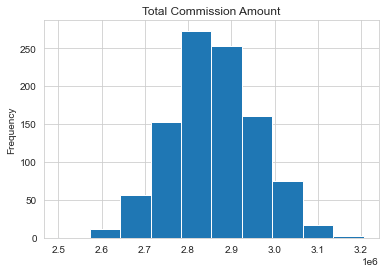

In [22]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

<AxesSubplot:ylabel='Frequency'>

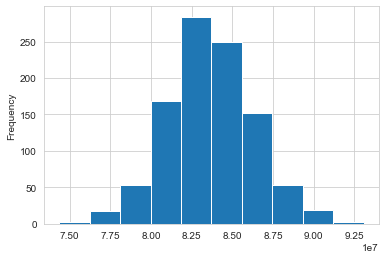

In [23]:
results_df['Sales'].plot(kind='hist')